# Project 1 - Exploratory Data Analysis

## Imports, loading dataset

In [19]:
# Imports
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import os
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "notebook_connected"
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [6]:
# Set current directory if necessary to /home/utilisateur/Python/DVF
os.chdir('/home/utilisateur/VSCode/FullStack/2. Exploratory Data Analysis/Speed Dating')
print(os.getcwd())

/home/utilisateur/VSCode/FullStack/2. Exploratory Data Analysis/Speed Dating


In [7]:
# Import & visualize dataset
df = pd.read_csv("Speed Dating Cleaned.csv")
print('Dataset loaded !')

Dataset loaded !


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 191 entries, iid to amb5_3
dtypes: float64(173), int64(11), object(7)
memory usage: 12.2+ MB


In [11]:
# Create a dataset where one line = one individual
df_individuals = df.drop_duplicates(subset = 'iid')[[   'iid',
                                                        'gender',
                                                        'age', 
                                                        'wave',
                                                        'field', 
                                                        'race',
                                                        'imprace',
                                                        'imprelig',
                                                        'goal',
                                                        'date',
                                                        'go_out',
                                                        'career',
                                                        'sports',
                                                        'tvsports',
                                                        'exercise',
                                                        'dining',
                                                        'museums',
                                                        'art',
                                                        'hiking',
                                                        'gaming',
                                                        'clubbing',
                                                        'reading',
                                                        'tv',
                                                        'theater',
                                                        'movies',
                                                        'concerts',
                                                        'music',
                                                        'shopping',
                                                        'yoga',
                                                        'expnum',
                                                        'attr1_1',
                                                        'sinc1_1',
                                                        'intel1_1',
                                                        'fun1_1',
                                                        'amb1_1',
                                                        'attr4_1',
                                                        'sinc4_1',
                                                        'intel4_1',
                                                        'fun4_1',
                                                        'amb4_1',
                                                        'shar4_1',
                                                        'attr2_1',
                                                        'sinc2_1',
                                                        'intel2_1',
                                                        'fun2_1',
                                                        'amb2_1',
                                                        'shar2_1',
                                                        'attr3_1',
                                                        'sinc3_1',
                                                        'intel3_1',
                                                        'fun3_1',
                                                        'amb3_1',
                                                        'attr5_1',
                                                        'sinc5_1',
                                                        'intel5_1',
                                                        'fun5_1',
                                                        'amb5_1',
                                                        'attr1_s',
                                                        'sinc1_s',
                                                        'intel1_s',
                                                        'fun1_s',
                                                        'amb1_s',
                                                        'attr3_s',
                                                        'sinc3_s',
                                                        'intel3_s',
                                                        'fun3_s',
                                                        'amb3_s'
                                                        ]]

df_individuals = df_individuals.merge(df.groupby('iid')['attr_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['sinc_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['intel_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['fun_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['amb_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['age_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['like_o'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['match'].sum(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['dec_o'].sum(), on='iid')

df_individuals = df_individuals.merge(df.groupby('iid')['attr'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['sinc'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['intel'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['fun'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['amb'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['like'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['match_es'].mean(), on='iid')
df_individuals = df_individuals.merge(df.groupby('iid')['dec'].sum(), on='iid')

df_individuals = df_individuals.merge(df.groupby('iid')['you_call'].mean(), on='iid')

df_individuals = df_individuals.merge(df.groupby('iid')['them_cal'].mean(), on='iid')

# df_individuals.drop(columns='condtn', inplace=True, axis = 1)


In [12]:
# Save dataset as new CSV file
df_individuals.to_csv('df_individuals.csv')

In [13]:
# Create one dataset for men, one for women
df_women = df_individuals[df_individuals['gender']=='F']

df_men = df_individuals[df_individuals['gender']=='M']

In [14]:
# Check for NaNs
nanglobal = df_individuals.isnull().sum().to_frame()
nanglobal.reset_index(inplace=True)
nanglobal.columns = ['variable','nanglobalcount']
nanmen = df_men.isnull().sum().to_frame()
nanmen.reset_index(inplace=True)
nanmen.columns = ['variable','nanmencount']
nanwomen = df_women.isnull().sum().to_frame()
nanwomen.reset_index(inplace=True)
nanwomen.columns = ['variable','nanwomencount']

Lots of missing values in
attrx_s : groups were forgotten halfway through (half values missing !)

In [15]:
#
nan = pd.merge(nanglobal, nanmen, on='variable')
nan = pd.merge(nan, nanwomen, on='variable')
nan = nan.sort_values(by='nanglobalcount', ascending=False)

In [16]:
#
df_individuals = df_individuals.sort_values(by='wave')

In [20]:
px.box(df_women[['sports',
                                                        'tvsports',
                                                        'exercise',
                                                        'dining',
                                                        'museums',
                                                        'art',
                                                        'hiking',
                                                        'gaming',
                                                        'clubbing',
                                                        'reading',
                                                        'tv',
                                                        'theater',
                                                        'movies',
                                                        'concerts',
                                                        'music',
                                                        'shopping',
                                                        'yoga']])

In [21]:
px.box(df_men[['sports',
                                                        'tvsports',
                                                        'exercise',
                                                        'dining',
                                                        'museums',
                                                        'art',
                                                        'hiking',
                                                        'gaming',
                                                        'clubbing',
                                                        'reading',
                                                        'tv',
                                                        'theater',
                                                        'movies',
                                                        'concerts',
                                                        'music',
                                                        'shopping',
                                                        'yoga']])

In [22]:
#
x0 = df_women['match_es']
x1 = df_women['match']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [23]:
#%%
px.histogram(df_women[['match_es','match']], barmode="overlay", title='Match prediction of women')

In [24]:
#%%
px.box(df_women[['match_es','match']],  title='Match prediction of women')

In [25]:
#%%
px.histogram(df_men[['match_es','match']], barmode="overlay", title='Match prediction of men')

In [26]:
#%%
px.box(df_men[['match_es','match']],  title='Match prediction of men')

In [27]:
#%%
px.box(df_men[['dec']], title='Number of decisions YES for men')

In [28]:
#%%
px.box(df_women[['dec']], title='Number of decisions YES for women')

VIZ

- attr1_1 what you look for
- attr4_1 what you think people look for
- attr2_1 what the other sex looks for according to you
- attr3_1 how do you see yourself
- attr5_1 how do you think the others see you
- attr how you judge your partner
- attr1_s what you look for, halfway through
- attr3_s how do you see yourself, halfway through

## Do people feel unique ?

In [29]:
categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ df_individuals['attr1_1'].mean(),
     df_individuals['sinc1_1'].mean(),
     df_individuals['intel1_1'].mean(),
     df_individuals['fun1_1'].mean(),
     df_individuals['amb1_1'].mean()],
      theta=categories,
      fill='toself',
      name='What you look for'
))

fig.add_trace(go.Scatterpolar(
     r=[ df_individuals['attr4_1'].mean(),
     df_individuals['sinc4_1'].mean(),
     df_individuals['intel4_1'].mean(),
     df_individuals['fun4_1'].mean(),
     df_individuals['amb4_1'].mean()],
      theta=categories,
      fill='toself',
      name='What you THINK people look for'
))


fig.update_layout(
    title={
        'text': "What people look for vs what they THINK people look for",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'white'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      #range=[5, 9]
    )),
  showlegend=True
)

fig.show()

In [30]:
#%%
px.histogram(df_individuals[['attr']])

In [31]:
#%%
px.histogram(df_individuals[['attr1_1']])

In [32]:
#%%
df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), ['attr']].mean()

attr    7.448739
dtype: float64

## When they said YES

In [33]:
categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'attr'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'sinc'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'intel'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'fun'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Men said yes to'
))


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'attr'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'sinc'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'intel'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'fun'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Women said yes to'
))


fig.update_layout(
    title={
        'text': "When they said YES (M) vs (F)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'white'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[6, 8]
    )),
  showlegend=True
)

fig.show()

In [34]:
categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'attr'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'sinc'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'intel'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'fun'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Men said yes to'
))


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'attr'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'sinc'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'intel'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'fun'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Men said no to'
))



fig.update_layout(
    title={
        'text': "When women said YES vs when women said NO",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'pink'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[4, 8]
    )),
  showlegend=True
)

fig.show()

In [35]:
#%%
'''
YES vs NO (F)
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'attr'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'sinc'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'intel'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'fun'].mean(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Women said yes to'
))


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'attr'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'sinc'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'intel'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'fun'].mean(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'amb'].mean()],
      theta=categories,
      fill='toself',
      name='Women said no to'
))



fig.update_layout(
    title={
        'text': "When men said YES vs when they said NO",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'lightblue'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[4, 8]
    )),
  showlegend=True
)

fig.show()

In [36]:
categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'attr'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'sinc'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'intel'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'fun'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'M'), 'amb'].median()],
      theta=categories,
      fill='toself',
      name='Women said yes to'
))


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'attr'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'sinc'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'intel'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'fun'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'M'), 'amb'].median()],
      theta=categories,
      fill='toself',
      name='Women said no to'
))

fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'attr'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'sinc'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'intel'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'fun'].median(),
     df.loc[(df['dec'] == 1) & (df['gender'] == 'F'), 'amb'].median()],
      theta=categories,
      fill='toself',
      name='Men said yes to'
))


fig.add_trace(go.Scatterpolar(
     r=[ df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'attr'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'sinc'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'intel'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'fun'].median(),
     df.loc[(df['dec'] == 0) & (df['gender'] == 'F'), 'amb'].median()],
      theta=categories,
      fill='toself',
      name='Men said no to'
))


fig.update_layout(
    title={
        'text': "YES vs NO : both genders",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'white'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[4, 8]
    )),
  showlegend=True
)

fig.show()

<AxesSubplot:>

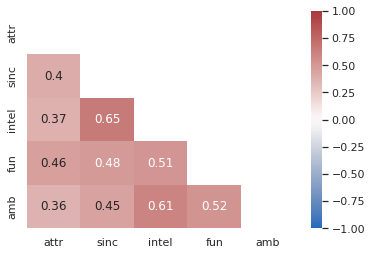

In [57]:
#%%
corre = df.loc[df['dec'] == 1, ['attr','sinc','intel','fun','amb']] #,'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1']]

corre_corr = corre.corr()
mask_ut=np.triu(np.ones(corre_corr.shape)).astype(bool)
sns.heatmap(corre_corr, xticklabels=corre_corr.columns, mask=mask_ut,yticklabels=corre_corr.columns, cmap='vlag', vmin=-1, vmax=1, annot=True)


<AxesSubplot:>

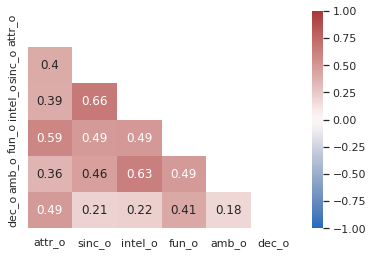

In [52]:
#%%
corre = df.loc[:, ['attr_o','sinc_o','intel_o','fun_o','amb_o','dec_o']] #,'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1']]
corre_corr = corre.corr()
mask_ut=np.triu(np.ones(corre_corr.shape)).astype(bool)
sns.heatmap(corre_corr, xticklabels=corre_corr.columns, mask=mask_ut,yticklabels=corre_corr.columns, cmap='vlag', vmin=-1, vmax=1, annot=True)

In [58]:
'''
How women see themselves vs. how they judge men
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ (df_women['attr3_s'].mean() + df_women['attr3_1'].mean())/2,
        (df_women['sinc3_s'].mean() + df_women['sinc3_1'].mean())/2,
        (df_women['intel3_s'].mean() + df_women['intel3_1'].mean())/2,
        (df_women['fun3_s'].mean() + df_women['fun3_1'].mean())/2,
        (df_women['amb3_s'].mean() + df_women['amb3_1'].mean())/2],
      theta=categories,
      fill='toself',
      name='Self-perception'
))

fig.add_trace(go.Scatterpolar(
     r=[ df_women['attr'].mean(),
        df_women['sinc'].mean(),
        df_women['intel'].mean(),
        df_women['fun'].mean(),
        df_women['amb'].mean()],
      theta=categories,
      fill='toself',
      name='Opinion on dated men'
))


fig.update_layout(
    title={
        'text': "How women perceive themselves (blue)<br> vs. <br>how women judge the men they date (red)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'pink'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[5, 9]
    )),
  showlegend=True
)

fig.show()

In [59]:
'''
How men see themselves vs. how they judge women
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ (df_men['attr3_s'].mean() + df_men['attr3_1'].mean())/2,
        (df_men['sinc3_s'].mean() + df_men['sinc3_1'].mean())/2,
        (df_men['intel3_s'].mean() + df_men['intel3_1'].mean())/2,
        (df_men['fun3_s'].mean() + df_men['fun3_1'].mean())/2,
        (df_men['amb3_s'].mean() + df_men['amb3_1'].mean())/2],
      theta=categories,
      fill='toself',
      name='Self-perception'
))

fig.add_trace(go.Scatterpolar(
     r=[ df_men['attr'].mean(),
        df_men['sinc'].mean(),
        df_men['intel'].mean(),
        df_men['fun'].mean(),
        df_men['amb'].mean()],
      theta=categories,
      fill='toself',
      name='Opinion on dated women'
))


fig.update_layout(
    title={
        'text': "How men perceive themselves (blue)<br> vs. <br>how men judge the women they date (red)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'lightblue'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[5, 9]
    )),
  showlegend=True
)

fig.show()

In [60]:
'''
How women perceive themselves initially (red) and halfway through (blue)
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ df_women['attr3_1'].mean(),
        df_women['sinc3_1'].mean(),
        df_women['intel3_1'].mean(),
        df_women['fun3_1'].mean(),
        df_women['amb3_1'].mean()],
      theta=categories,
      fill='toself',
      name='Initial'
))

fig.add_trace(go.Scatterpolar(
     r=[ df_women['attr3_s'].mean(),
        df_women['sinc3_s'].mean(),
        df_women['intel3_s'].mean(),
        df_women['fun3_s'].mean(),
        df_women['amb3_s'].mean()],
      theta=categories,
      fill='toself',
      name='Halfway through'
))


fig.update_layout(
    title={
        'text': "How women perceive themselves initially (red)<br> vs. <br>how women perceive themselves halfway through (blue)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'pink'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[6.5, 8.5]
    )),
  showlegend=True
)

fig.show()

In [61]:
'''
How men perceive themselves initially (red) and halfway through (blue)
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
     r=[ df_men['attr3_1'].mean(),
        df_men['sinc3_1'].mean(),
        df_men['intel3_1'].mean(),
        df_men['fun3_1'].mean(),
        df_men['amb3_1'].mean()],
      theta=categories,
      fill='toself',
      name='Initial'
))
fig.add_trace(go.Scatterpolar(
     r=[ df_men['attr3_s'].mean(),
        df_men['sinc3_s'].mean(),
        df_men['intel3_s'].mean(),
        df_men['fun3_s'].mean(),
        df_men['amb3_s'].mean()],
      theta=categories,
      fill='toself',
      name='Halfway through'
))

fig.update_layout(
    title={
        'text': "How men perceive themselves initially (red)<br> vs. <br>how men perceive themselves halfway through (blue)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'lightblue'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[6.5, 8.5]
    )),
  showlegend=True
)

fig.show()


'''
NOTE :
Women tend to feel noticeably MORE attractive after a few dates
Both sexes tend to feel LESS intelligent than initially LESS sincere than initially after a few dates
'''

'\nNOTE :\nWomen tend to feel noticeably MORE attractive after a few dates\nBoth sexes tend to feel LESS intelligent than initially LESS sincere than initially after a few dates\n'

In [62]:
'''
How men perceive themselves vs. how women perceive themselves, on average
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ (df_men['attr3_s'].mean() + df_men['attr3_1'].mean())/2,
        (df_men['sinc3_s'].mean() + df_men['sinc3_1'].mean())/2,
        (df_men['intel3_s'].mean() + df_men['intel3_1'].mean())/2,
        (df_men['fun3_s'].mean() + df_men['fun3_1'].mean())/2,
        (df_men['amb3_s'].mean() + df_men['amb3_1'].mean())/2],
      theta=categories,
      fill='toself',
      name='Men'
))
fig.add_trace(go.Scatterpolar(
     r=[ (df_women['attr3_s'].mean() + df_women['attr3_1'].mean())/2,
        (df_women['sinc3_s'].mean() + df_women['sinc3_1'].mean())/2,
        (df_women['intel3_s'].mean() + df_women['intel3_1'].mean())/2,
        (df_women['fun3_s'].mean() + df_women['fun3_1'].mean())/2,
        (df_women['amb3_s'].mean() + df_women['amb3_1'].mean())/2],
      theta=categories,
      fill='toself',
      name='Women'
))
fig.update_layout(
    title={
        'text': "How men perceive themselves (red)<br> vs. <br>how women perceive themselves (blue)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[6.5, 8.5]
    )),
  showlegend=True
)

fig.show()

In [63]:
'''
What men and women say they look for
'''

categories = ['Attractivity','Sincerity','Intelligence',
           'Fun', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
     r=[ df_women['attr3_1'].mean(),
        df_women['sinc3_1'].mean(),
        df_women['intel3_1'].mean(),
        df_women['fun3_1'].mean(),
        df_women['amb3_1'].mean()],
      theta=categories,
      fill='toself',
      name='Initial'
))

fig.add_trace(go.Scatterpolar(
     r=[ df_women['attr3_s'].mean(),
        df_women['sinc3_s'].mean(),
        df_women['intel3_s'].mean(),
        df_women['fun3_s'].mean(),
        df_women['amb3_s'].mean()],
      theta=categories,
      fill='toself',
      name='Halfway through'
))


fig.update_layout(
    title={
        'text': "How women perceive themselves initially (red)<br> vs. <br>how women perceive themselves halfway through (blue)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor = 'pink'
)
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[6.5, 8.5]
    )),
  showlegend=True
)

fig.show()


###  TODO
graphique évolution what you look for en fonction de l'age
radar chart what you look for au début et au milieu

<AxesSubplot:xlabel='intel3_1', ylabel='intel'>

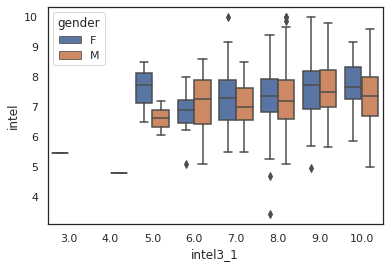

In [64]:
sns.boxplot(x=df_individuals['intel3_1'], y=df_individuals['intel'],hue=df_individuals['gender'])

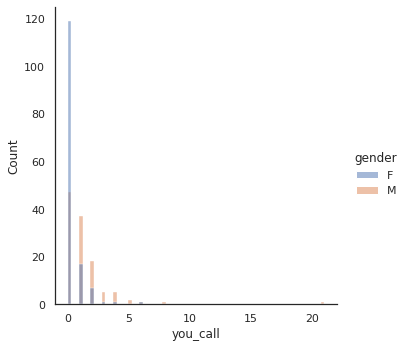

In [65]:
#%%
sns.displot(x=df_individuals['you_call'], hue=df_individuals['gender'])

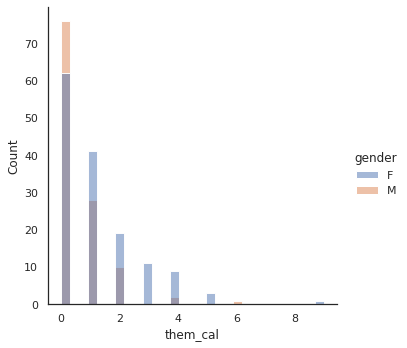

In [66]:
sns.displot(x=df_individuals['them_cal'], hue=df_individuals['gender'])

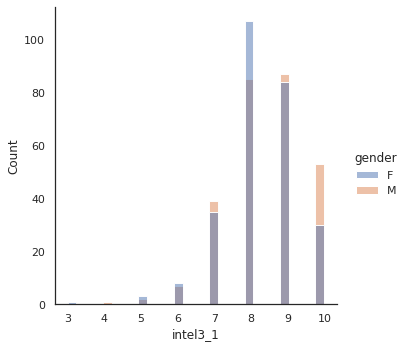

In [67]:
sns.displot(x=df_individuals['intel3_1'],hue=df_individuals['gender'])

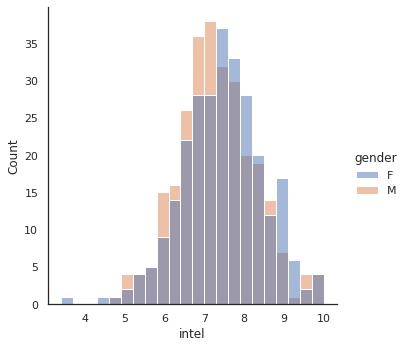

In [68]:
sns.displot(x=df_individuals['intel'],hue=df_individuals['gender'])

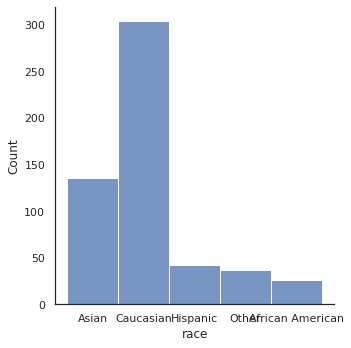

In [69]:
sns.displot(x=df_individuals['race'])

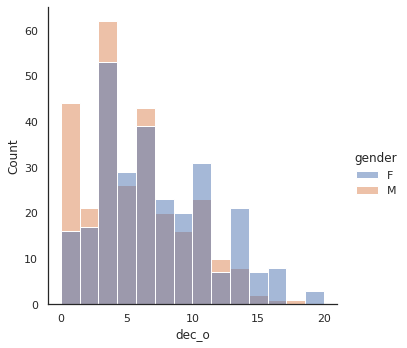

In [70]:
sns.displot(x=df_individuals['dec_o'],hue=df_individuals['gender'])
plt.show()

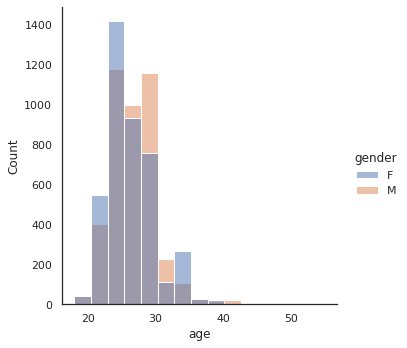

In [71]:
sns.displot(x=df['age'], hue = df['gender'], bins=15)

<AxesSubplot:xlabel='age', ylabel='gender'>

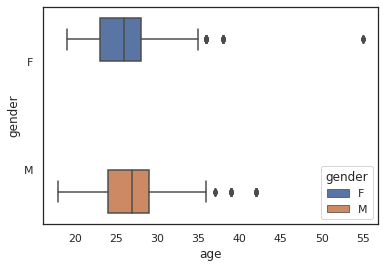

In [72]:
sns.boxplot(y=df['gender'], x=df['age'], hue = df['gender'])

<AxesSubplot:>

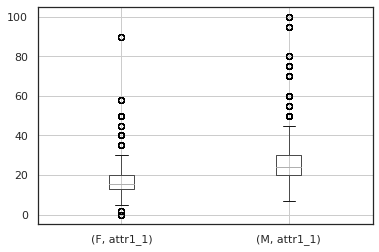

In [73]:
df.groupby('gender').boxplot(column=['attr1_1'], subplots=False)

<AxesSubplot:>

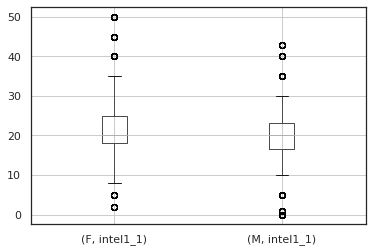

In [74]:
df.groupby('gender').boxplot(column=['intel1_1'], subplots=False)

<AxesSubplot:>

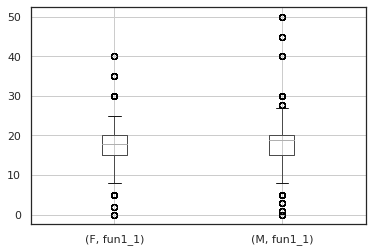

In [75]:
df.groupby('gender').boxplot(column=['fun1_1'], subplots=False)

<AxesSubplot:>

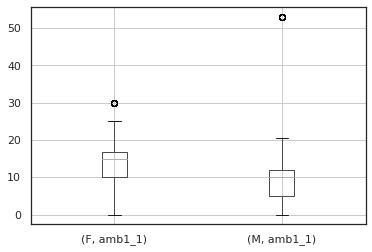

In [76]:
df.groupby('gender').boxplot(column=['amb1_1'], subplots=False)

<AxesSubplot:>

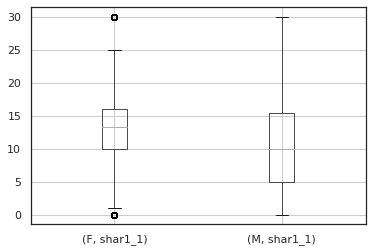

In [77]:
df.groupby('gender').boxplot(column=['shar1_1'], subplots=False)

<AxesSubplot:>

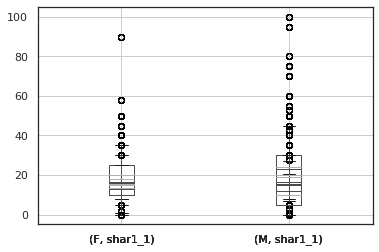

In [78]:
#%%
df.groupby('gender').boxplot(column=['attr1_1'], subplots=False)
#%%
df.groupby('gender').boxplot(column=['intel1_1'], subplots=False)
#%%
df.groupby('gender').boxplot(column=['fun1_1'], subplots=False)
#%%
df.groupby('gender').boxplot(column=['amb1_1'], subplots=False)
#%%
df.groupby('gender').boxplot(column=['shar1_1'], subplots=False)

In [79]:
print('Individu médian recherché par chaque sexe')
print('Attractivité')
print(df.groupby('gender')['attr1_1'].median())
print('Intelligence')
print(df.groupby('gender')['intel1_1'].median())
print('Fun')
print(df.groupby('gender')['fun1_1'].median())
print('Ambition')
print(df.groupby('gender')['amb1_1'].median())
print('Même centres d''intérêt')
print(df.groupby('gender')['shar1_1'].median())

Individu médian recherché par chaque sexe
Attractivité
gender
F    15.380
M    23.905
Name: attr1_1, dtype: float64
Intelligence
gender
F    20.0
M    20.0
Name: intel1_1, dtype: float64
Fun
gender
F    17.78
M    18.75
Name: fun1_1, dtype: float64
Ambition
gender
F    15.0
M    10.0
Name: amb1_1, dtype: float64
Même centres dintérêt
gender
F    13.21
M    10.00
Name: shar1_1, dtype: float64


In [80]:
median_total_F = df[df['gender']=='F'].shar1_1.median() + df[df['gender']=='F'].attr1_1.median() + df[df['gender']=='F'].intel1_1.median() + df[df['gender']=='F'].fun1_1.median() + df[df['gender']=='F'].amb1_1.median()
print('Somme des médianes de chaque caractéristique recherchées (Femmes)')
print(median_total_F)
#%%
median_total_M = df[df['gender']=='M'].shar1_1.median() + df[df['gender']=='M'].attr1_1.median() + df[df['gender']=='M'].intel1_1.median() + df[df['gender']=='M'].fun1_1.median() + df[df['gender']=='M'].amb1_1.median()
print('Somme des médianes de chaque caractéristique recherchées (Hommes)')
print(median_total_M)

Somme des médianes de chaque caractéristique recherchées (Femmes)
81.37
Somme des médianes de chaque caractéristique recherchées (Hommes)
82.655


<AxesSubplot:>

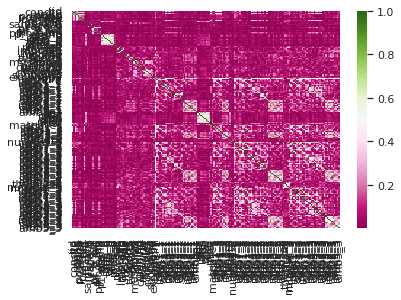

In [81]:
# Plot the heatmap and annotation on it
df_Corr = df.corr().abs()
sns.heatmap(df_Corr, xticklabels=df_Corr.columns, yticklabels=df_Corr.columns, cmap='PiYG')

## Predict second date

In [84]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = df.columns
X = df.drop(['dec'], axis=1)
y = df.loc[:,"dec"]
print("...Done.")


Separating labels from features...
...Done.


In [103]:

# Divide dataset Train set & Test set 
## First we import train_test_split

print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Allows you to stratify your sample.
# Meaning, you will have the same proportion of categories in test and train set
print("...Done.")

Splitting dataset into train set and test set...
...Done.


In [104]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")

# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)


Encoding categorical features and standardizing numerical features...
Found numeric features  ['iid', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'mn_sat', 'tuition', 'imprace', 'imprelig', 'zipcode', 'income', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'si

In [105]:
# Missing values
print("Imputing missing values...")
print(X_train)
print()
imputer = SimpleImputer(strategy="mean") # Instanciate class of SimpleImputer with strategy of mean
# Other strategies : median, most_frequent, constant
# Also exists : IterativeImputer (regression)
X_train = X_train.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
X_test = X_test.copy()

X_train.iloc[:,numeric_indices] = imputer.fit_transform(X_train.iloc[:,numeric_indices])
X_test.iloc[:,numeric_indices] = imputer.fit_transform(X_test.iloc[:,numeric_indices])
# Fit and transform columns where there are missing values
print("...Done!")
print(X_train)


Imputing missing values...
      iid gender  condtn  wave  round  position  positin1  order  partner  \
2480  181      F       1     8     10         5       5.0      2        3   
751    53      M       2     2     19         5       NaN     12        1   
3775  261      F       2    11     21         3       3.0     14       17   
5344  358      F       2    14     18        18      18.0     17       15   
5864  385      F       2    15     19        12      12.0     17        7   
...   ...    ...     ...   ...    ...       ...       ...    ...      ...   
4373  290      M       2    11     21        11      11.0      9        6   
7891  530      F       2    21     22         2       2.0      5       20   
4859  323      F       1    13      9         5       5.0      6        7   
3264  226      M       2     9     20         1       1.0      1       17   
2732  200      F       2     9     20        18      18.0     20        5   

        pid  ...  attr3_3  sinc3_3  intel3_3  fu

In [106]:

numeric_transformer = StandardScaler()
# Also exists : MinMaxScaler()

categorical_transformer = OneHotEncoder()

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )
X_train = featureencoder.fit_transform(X_train)
print("...Done.")
print(X_train[:5])
# Print first 5 rows (not using iloc since now X_train became a numpy array)


...Done.
  (0, 0)	1.0
  (0, 197)	1.0
  (0, 503)	1.0
  (0, 504)	1.0
  (0, 543)	1.0
  (0, 780)	1.0
  (0, 1040)	1.0
  (0, 1155)	-0.6481699934648155
  (0, 1156)	-2.2182188123912945
  (0, 1157)	-0.5592398767307999
  (0, 1158)	-1.5875352380639673
  (0, 1159)	-0.7313117448816466
  (0, 1160)	-0.8615441731521866
  (0, 1161)	-1.2616374231397518
  (0, 1162)	-1.0875885685415554
  (0, 1163)	-0.6174095683518275
  (0, 1164)	2.243301861168941
  (0, 1165)	0.8082712446414774
  (0, 1166)	-0.8071880133592133
  (0, 1167)	-0.6718537090016098
  (0, 1168)	1.010679928698815
  (0, 1169)	-0.24299536435044422
  (0, 1170)	0.2890650485794852
  (0, 1171)	0.2848445036030631
  (0, 1172)	-0.12876734034032958
  :	:
  (4, 1302)	-3.9107392606703786e-16
  (4, 1305)	-7.031419350423608e-16
  (4, 1308)	-4.3938267924483067e-16
  (4, 1310)	-4.130421718687206e-16
  (4, 1311)	-7.89042582623218e-16
  (4, 1313)	-1.0016887318453008e-15
  (4, 1314)	-2.957295577508835e-16
  (4, 1315)	-4.144825584710473e-16
  (4, 1317)	5.30615473485851

In [107]:

#%%

# Encoding labels
print("Encoding labels...")
print(y_train)

labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(y_train)
print("...Done.")
print(Y_train[:5])
# Print first 5 rows (not using iloc since now y_train became a numpy array)


Encoding labels...
2480    1
751     0
3775    1
5344    0
5864    0
       ..
4373    1
7891    0
4859    0
3264    0
2732    0
Name: dec, Length: 6702, dtype: int64
...Done.
[1 0 1 0 0]


In [108]:


# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

#%%

# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = featureencoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()


Train model...
...Done.
Predictions on training set...
...Done.
[ 1.13426454  0.46065658  0.52764766  0.11250297 -0.15589961]

--- Testing pipeline ---
Standardizing numerical features...
        iid gender  condtn  wave  round  position   positin1  order  partner  \
2265  165.0      M     2.0   7.0   16.0      10.0  12.000000   15.0      2.0   
2851  206.0      F     2.0   9.0   20.0      16.0  16.000000    7.0      4.0   
3655  256.0      F     2.0  11.0   21.0       7.0   7.000000    1.0      2.0   
196    20.0      M     1.0   1.0   10.0       5.0   9.271057    7.0      7.0   
3719  259.0      F     2.0  11.0   21.0       1.0   1.000000    8.0      3.0   
...     ...    ...     ...   ...    ...       ...        ...    ...      ...   
7639  519.0      F     2.0  21.0   22.0      20.0  20.000000   10.0     10.0   
5258  354.0      F     2.0  14.0   18.0      19.0  19.000000   14.0      1.0   
3353  231.0      M     2.0   9.0   20.0      19.0   8.000000   12.0      6.0   
6692  442.0 

In [109]:

# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

#%%

# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

# Print RMSE score
rms_score = sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rms_score)

# Print MAE score
mae_score = mean_absolute_error(y_test, y_test_pred)
print(mae_score)

print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)



Predictions on test set...
...Done.
[-0.0459716   0.91136692  0.29699671  0.07055811  0.25411966]

--- Assessing the performances of the model ---
R2 score on training set :  0.6667398969743888
R2 score on test set :  0.615601248934545
RMSE: 0.30471992770616085
0.24555042253520415
coefficients are:  [-0.01244289  0.01244289 -0.01789578 ...  0.02612323 -0.00265092
  0.0105179 ]
Constant is:  0.40852358214012463
